<a href="https://colab.research.google.com/github/Pragna-Teja-Durishetti/ACAstockPredictionTasks/blob/main/Assignment2Code%3ALogistic_Regression_on_the_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd



Dataset = pd.read_csv('/content/Titanic-Dataset.csv')


print("First 5 rows:\n", Dataset.head())

print("\nData types:\n", Dataset.dtypes)


print("\nMissing values per column:\n", Dataset.isnull().sum())


First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   Na

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
def preprocess(df):

    df['Age'].fillna(df['Age'].median(), inplace=True)

    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Cabin has many missing values. So I dropped the column entirely.

    df.drop(columns=['Cabin'], inplace=True)
    df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

    le_sex = LabelEncoder()
    df['Sex'] = le_sex.fit_transform(df['Sex'])

    le_embarked = LabelEncoder()
    df['Embarked'] = le_embarked.fit_transform(df['Embarked'])
    df = pd.get_dummies(df, columns=['Pclass'], prefix='Pclass')


    scaler = StandardScaler()
    df[['Fare', 'Age']] = scaler.fit_transform(df[['Fare', 'Age']])
    return df

df = preprocess(Dataset)

print("\nProcessed DataFrame sample:\n", df.head())




Processed DataFrame sample:
    Survived  Sex       Age  SibSp  Parch      Fare  Embarked  Pclass_1  \
0         0    1 -0.565736      1      0 -0.502445         2     False   
1         1    0  0.663861      1      0  0.786845         0      True   
2         1    0 -0.258337      0      0 -0.488854         2     False   
3         1    0  0.433312      1      0  0.420730         2      True   
4         0    1  0.433312      0      0 -0.486337         2     False   

   Pclass_2  Pclass_3  
0     False      True  
1     False     False  
2     False      True  
3     False     False  
4     False      True  


<ipython-input-6-4093060866>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-6-4093060866>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



features = ['Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked', 'SibSp', 'Parch']
X = df[features]
y = df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

coefficients = pd.Series(model.coef_[0], index=X.columns)
print("Model Coefficients:\n", coefficients)
print("\nIntercept:", model.intercept_[0])

print("\nInterpretation:")
for feature, coef in coefficients.items():
    if coef > 0:
        print(f"  Higher {feature} increases probability of survival.")
    else:
        print(f"   Higher {feature} decreases probability of survival.")


Model Coefficients:
 Sex        -2.585546
Age        -0.370835
Fare        0.178411
Pclass_1    0.722242
Pclass_2    0.242016
Pclass_3   -0.963042
Embarked   -0.246791
SibSp      -0.287059
Parch      -0.124608
dtype: float64

Intercept: 1.933012294179243

Interpretation:
   Higher Sex decreases probability of survival.
   Higher Age decreases probability of survival.
  Higher Fare increases probability of survival.
  Higher Pclass_1 increases probability of survival.
  Higher Pclass_2 increases probability of survival.
   Higher Pclass_3 decreases probability of survival.
   Higher Embarked decreases probability of survival.
   Higher SibSp decreases probability of survival.
   Higher Parch decreases probability of survival.


In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)


conf_matrix = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.7988826815642458

Confusion Matrix:
 [[90 15]
 [21 53]]

Precision: 0.7794117647058824
Recall: 0.7162162162162162
F1-score: 0.7464788732394366


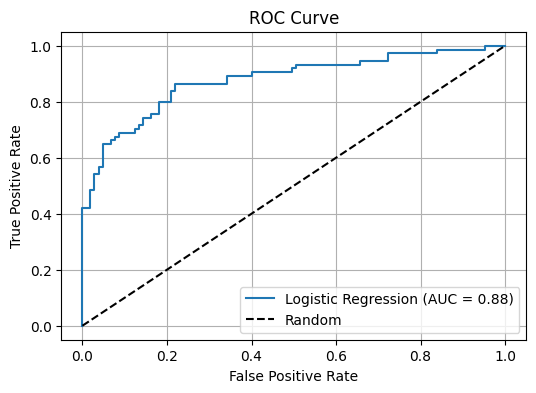

AUC Score: 0.8770913770913771


In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


y_proba = model.predict_proba(X_val)[:, 1]

fpr, tpr, thresholds = roc_curve(y_val, y_proba)
auc_score = roc_auc_score(y_val, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

print("AUC Score:", auc_score)


In [10]:

test_df = pd.read_csv('/content/titanic_test.csv')
original = test_df
test_df['Age'] = test_df['Age'].fillna(df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(df['Fare'].median())
test_df['Embarked'] = test_df['Embarked'].fillna(df['Embarked'].mode()[0])

X_test = preprocess(test_df)
features = ['Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked', 'SibSp', 'Parch']
X_test = X_test[features]



y_test_pred = model.predict(X_test)


<ipython-input-6-4093060866>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-6-4093060866>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [11]:
submission = pd.DataFrame({
    'PassengerId': pd.read_csv('/content/titanic_test.csv')['PassengerId'],
    'Survived': y_test_pred
})


submission.to_csv('submission.csv', index=False)
print("✅ Submission file saved as 'submission.csv'")


✅ Submission file saved as 'submission.csv'
